In [1]:
import radarsimpy
radarsimpy.__version__

'11.1.0'

# Phase Noise

<a href="https://radarsimx.github.io/radarsimpy/" target="_blank" rel="nofollow"><img src="https://img.shields.io/badge/Documentation-latest-brightgree?style=flat&logo=read-the-docs" height="20"></a>
<a href="https://radarsimx.com/product/radarsimpy/" target="_blank"><img src="https://img.shields.io/badge/Download-latest-brightgree?style=flat&logo=python" height="20"></a>

[`RadarSimPy`](https://radarsimx.com/radarsimx/radarsimpy/) supports the simulation of transmitter's phase noise. This is an example of adding phase noise into the radar module.


## Radar Model

### Phase noise

Phase noise is defined by two arrays: `frequency offset (Hz)` and `power density (dB/Hz)`

In [2]:
import numpy as np

phase_noise_freq = np.array([10000, 10694, 11444, 12195, 12945, 13696, 14446, 15197, 15947, 16698, 17448, 18199, 18949, 19700, 20450, 21201, 21951, 22702, 23452, 24203, 24953, 25704, 26454, 27205, 27956, 28706, 29457, 30281, 32536, 34790, 37045, 39299, 41554, 43808, 46062, 48317, 50571, 52826, 55080, 57335, 59589, 61844, 64098, 66353, 68607, 70862, 73116, 75371, 77625, 79879, 82134, 84388, 86643, 88897, 91152, 93406, 95661, 97915, 100000, 106935, 114440, 121946, 129451, 136956, 144461, 151967, 159472, 166977, 174482, 181987, 189493, 196998, 204503, 212008, 219514, 227019, 234524, 242029, 249535, 257040, 264545, 272050, 279555, 287061, 294566, 302812, 325357, 347901, 370446, 392991, 415535, 438080, 460625, 483169, 505714, 528259, 550803, 573348, 595893, 618438, 640982, 663527, 686072, 708616, 731161, 753706, 776250, 798795, 821340, 843884, 866429, 888974, 911518, 934063, 956608, 979152, 1000000, 1069352, 1144404, 1219457, 1294509, 1369561, 1444613, 1519666, 1594718, 1669770, 1744822, 1819875,
                             1894927, 1969979, 2045032, 2120084, 2195136, 2270188, 2345241, 2420293, 2495345, 2570397, 2645450, 2720502, 2795554, 2870606, 2945659, 3028119, 3253566, 3479013, 3704460, 3929907, 4155353, 4380800, 4606247, 4831694, 5057141, 5282587, 5508034, 5733481, 5958928, 6184375, 6409821, 6635268, 6860715, 7086162, 7311608, 7537055, 7762502, 7987949, 8213396, 8438842, 8664289, 8889736, 9115183, 9340630, 9566076, 9791523, 10000000, 10693520, 11444043, 12194565, 12945088, 13695610, 14446132, 15196655, 15947178, 16697700, 17448222, 18198744, 18949268, 19699788, 20450312, 21200834, 21951356, 22701880, 23452402, 24202924, 24953446, 25703968, 26454492, 27205012, 27955536, 28706060, 29456580, 30281194, 32535662, 34790132, 37044600, 39299064, 41553536, 43808000, 46062472, 48316936, 50571408, 52825872, 55080340, 57334808, 59589276, 61843744, 64098208, 66352680, 68607144, 70861616, 73116080, 75370552, 77625016, 79879488, 82133952, 84388424, 86642888, 88897360, 91151824, 93406296, 95660760, 97915224, 100000000])
phase_noise_power = np.array([-74.82, -75.24, -75.59, -75.90, -76.14, -76.30, -76.38, -76.43, -76.48, -76.59, -76.78, -77.08, -77.47, -77.91, -78.38, -78.83, -79.23, -79.58, -79.89, -80.16, -80.41, -80.65, -80.91, -81.18, -81.48, -81.79, -82.10, -82.39, -82.65, -82.86, -83.01, -83.09, -83.11, -83.06, -82.98, -82.86, -82.73, -82.58, -82.44, -82.29, -82.15, -82.01, -81.86, -81.72, -81.58, -81.43, -81.29, -81.14, -81, -80.87, -80.76, -80.66, -80.58, -80.53, -80.52, -80.54, -80.60, -80.70, -80.85, -81.05, -81.31, -81.60, -81.95, -82.32, -82.72, -83.13, -83.53, -83.91, -84.28, -84.62, -84.95, -85.29, -85.65, -86.04, -86.47, -86.94, -87.44, -87.94, -88.44, -88.92, -89.37, -89.81, -90.22, -90.63, -91.05, -91.48, -91.94, -92.41, -92.91, -93.42, -93.95, -94.49, -95.04, -95.59, -96.13, -96.66, -97.17, -97.67, -98.15, -98.61, -99.04, -99.46, -99.86, -100.24, -100.62, -100.99, -101.35, -101.72, -102.08, -102.44, -102.81, -103.2, -103.59, -104.02, -104.47, -104.97, -105.5, -106.07, -106.68, -107.31, -
                              107.96, -108.61, -109.26, -109.9, -110.51, -111.1, -111.66, -112.18, -112.65, -113.07, -113.44, -113.77, -114.06, -114.33, -114.6, -114.91, -115.27, -115.7, -116.18, -116.72, -117.29, -117.88, -118.48, -119.06, -119.64, -120.2, -120.76, -121.31, -121.85, -122.39, -122.93, -123.46, -123.97, -124.48, -124.97, -125.43, -125.88, -126.3, -126.7, -127.09, -127.44, -127.78, -128.09, -128.38, -128.64, -128.87, -129.1, -129.31, -129.52, -129.75, -130.01, -130.3, -130.62, -130.98, -131.37, -131.78, -132.19, -132.6, -132.99, -133.36, -133.71, -134.03, -134.32, -134.58, -134.82, -135.02, -135.19, -135.34, -135.45, -135.53, -135.59, -135.65, -135.71, -135.78, -135.87, -135.98, -136.12, -136.28, -136.45, -136.62, -136.78, -136.93, -137.06, -137.17, -137.27, -137.36, -137.45, -137.52, -137.59, -137.66, -137.73, -137.79, -137.84, -137.89, -137.93, -137.96, -137.97, -137.98, -137.98, -137.97, -137.96, -137.94, -137.94, -137.94, -137.96, -137.98, -138.01, -138.04, -138.05, -138.06, -138.04, -138.02, -137.96])


Plot phase noise

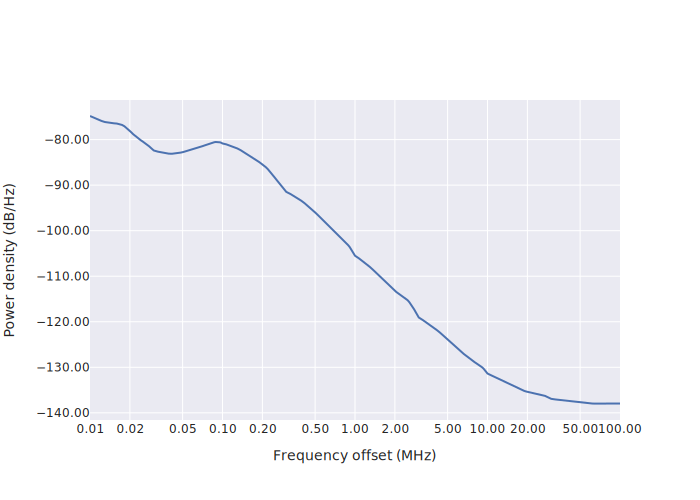

In [3]:
import plotly.graph_objs as go
from IPython.display import SVG, display

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=phase_noise_freq/1000000,
    y=phase_noise_power,
    name='Phase noise',
))

fig.update_layout(
    # title='Phase noise',
    template="seaborn",
    yaxis=dict(tickformat='.2f', title='Power density (dB/Hz)'),
    xaxis=dict(tickformat='.2f', title='Frequency offset (MHz)', type="log"),
)

# fig.show()
# fig.write_image('phase_noise.svg', height=400, width=600)
display(SVG(fig.to_image(format='svg', scale=1)))


### Transmitter

Setup the basic transmitter parameters through `Transmitter` module.

For comparison, we create two transmitters:

- `tx_pn` with phase noise
- `tx` without phase noise.

In [4]:
from radarsimpy import Radar, Transmitter, Receiver

tx_channel = dict(
    location=(0, 0, 0),
)

tx_pn = Transmitter(
    f=[24.125e9-50e6, 24.125e9+50e6],
    t=80e-6,
    tx_power=20,
    prp=100e-6,
    pulses=128,
    pn_f=phase_noise_freq,
    pn_power=phase_noise_power,
    channels=[tx_channel])

tx = Transmitter(f=[24.125e9-50e6, 24.125e9+50e6],
                 t=80e-6,
                 tx_power=20,
                 prp=100e-6,
                 pulses=128,
                 channels=[tx_channel])


## Receiver
 
Setup the receiver parameters through `Receiver` module.

The parameters of the receiver are listed in the table below.

 | Parameter                        | Variable in `RadarSimPy` | Value        |
 | -------------------------------- | ------------------------ | ------------ |
 | Sampling rate ($f_s$)            | fs                       | 2 Msps       |
 | Noise figure ($NF$)              | noise_figure             | 12 dB        |
 | RF gain/loss ($G_{rf}$)          | rf_gain                  | 20 dB        |
 | Load resistor ($R_L$)            | load_resistor            | 500 $\Omega$ |
 | Baseband voltage gain ($G_{BB}$) | baseband_gain            | 30 dB        |

In [5]:
rx_channel = dict(
    location=(0, 0, 0),
)

rx = Receiver(fs=2e6,
              noise_figure=12,
              rf_gain=20,
              load_resistor=500,
              baseband_gain=30,
              channels=[rx_channel])


 Create the FMCW radar model based on all the parameters defined above.
 
 - `radar_pn` with phase noise
 - `radar` without phase noise

In [6]:
radar_pn = Radar(transmitter=tx_pn, receiver=rx)
radar = Radar(transmitter=tx, receiver=rx)


 ### Targets
 The propertities of targets are defined here. There are 2 targets in this simulation. The locations of the targets are defined through $(x, y, z)$ coordinates in meters, and the speeds of the targets are defined trough $(v_x, v_y, v_z)$ in $m/s$. The propertites of the targets also includes radar cross-section (RCS (dBsm)) and phase (degree).

In [7]:
target_1 = dict(location=(150, 20, 0), speed=(0, 0, 0), rcs=70, phase=0)
target_2 = dict(location=(80, -5, 0), speed=(0, 0, 0), rcs=40, phase=0)

targets = [target_1, target_2]


## Simulate Baseband Signals
 
Use the `simulator` module to simulate the baseband samples. The user can choose between Python engine `simpy` or C++ engine `simc`.

The output baseband data is a 3-D matrix:

$[channels, pulses, ADC~samples]$
 
#### Simulate with C++ engine

In [8]:
from radarsimpy.simulator import simc

raw_data_pn = simc(radar_pn, targets)
time_matrix_pn = raw_data_pn['timestamp']
data_matrix_pn = raw_data_pn['baseband']

raw_data = simc(radar, targets)
time_matrix = raw_data['timestamp']
data_matrix = raw_data['baseband']


 ## Radar Signal Processing
 ### Range profile

In [9]:
from scipy import signal
import radarsimpy.processing as proc

range_window = signal.chebwin(radar.samples_per_pulse, at=60)

range_profile_pn = proc.range_fft(data_matrix_pn, range_window)
range_profile = proc.range_fft(data_matrix, range_window)


Plot the average of the range profiles

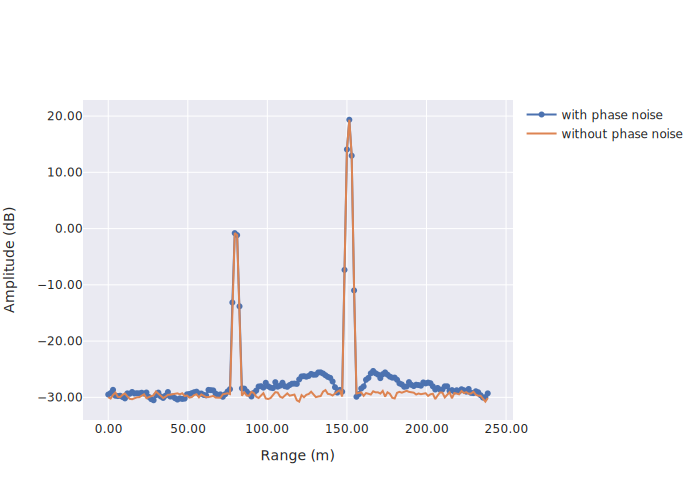

In [10]:
max_range = (3e8 * radar.receiver.fs *
             radar.transmitter.pulse_length /
             radar.transmitter.bandwidth / 2)
range_axis = np.linspace(
    0, max_range, radar.samples_per_pulse, endpoint=False)

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=range_axis,
    y=20*np.log10(np.mean(np.abs(range_profile_pn[0, :, :]), axis=0)),
    mode='lines+markers',
    name='with phase noise',
))

fig.add_trace(go.Scatter(
    x=range_axis,
    y=20*np.log10(np.mean(np.abs(range_profile[0, :, :]), axis=0)),
    name='without phase noise',
))

fig.update_layout(
    # title='Range Profile',
    template="seaborn",
    yaxis=dict(tickformat='.2f', title='Amplitude (dB)'),
    xaxis=dict(tickformat='.2f', title='Range (m)'),
)

# fig.show()
display(SVG(fig.to_image(format='svg', scale=1)))
# fig.write_image('range_profile_with_pn.svg', height=400, width=600)
